# IMPORT PART

In [2]:
# to work with the interpreter and system-related functions
import sys
!{sys.executable} -m pip install -U scikit-learn
!{sys.executable} -m pip install -U numpy
!{sys.executable} -m pip install -U matplotlib
!{sys.executable} -m pip install -U pillow

# Before running the code, make sure to download the necessary libraries. 

# Most of the libraries come pre-installed with python, but some may require additional installation.


# to work with arrays and linear algebra
''' 
    to install numpy, run the following command in the terminal or command prompt: 
        pip install numpy
'''
import numpy as np

''' 
    to install matplotlib, run the following command in the terminal or command prompt: 
        pip install matplotlib
'''
# to create visualizations
import matplotlib as plt
# to plot graphs
import matplotlib.pyplot

# to generate random numbers
import random as rd

# to perform mathematical operations
import math

# to interact with the operating system
import os

# to handle image files
'''
    PIL can be installed with the following command:
        pip install pillow
'''
import PIL

# to measure the elapsed time of the program
from time import process_time

from sklearn.decomposition import PCA


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\musker\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Q1: PERCEPTRON LEARNING ALGORITHM

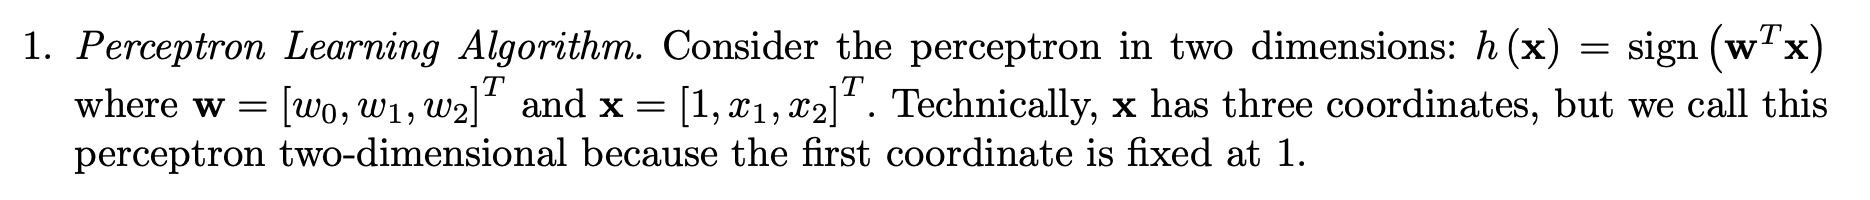

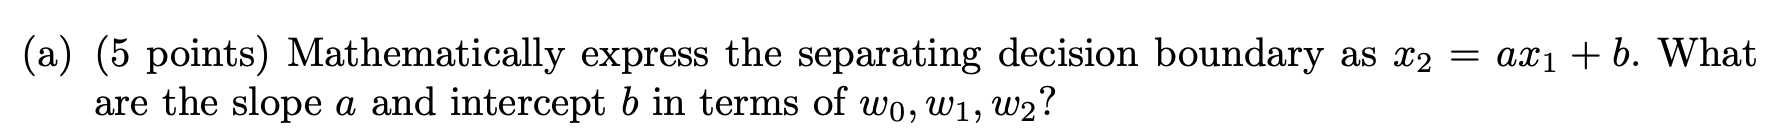

*This part is on the pdf document.*

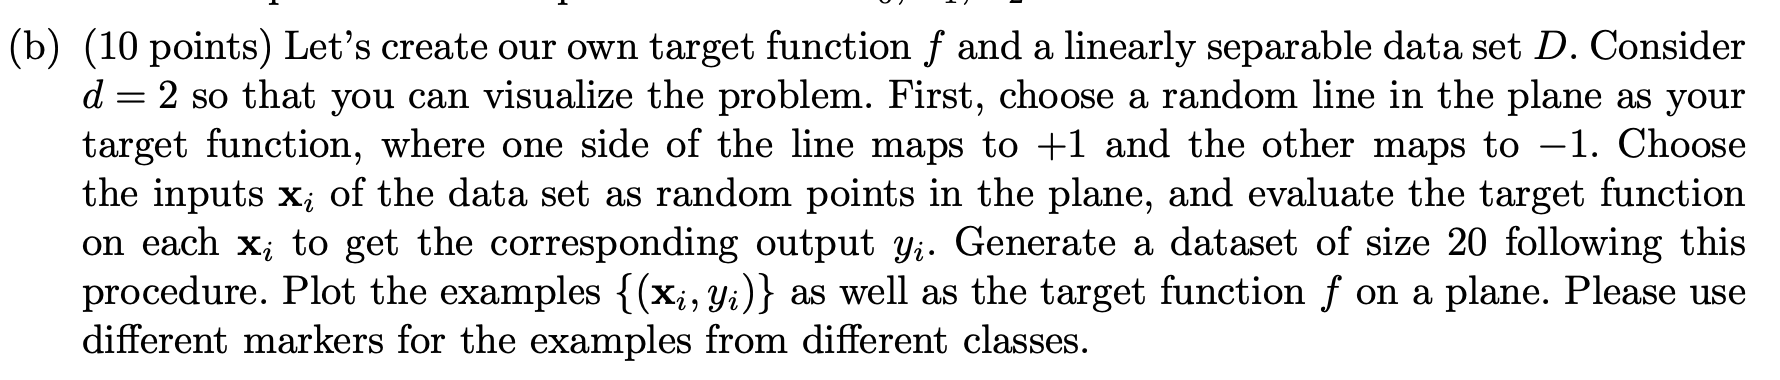

In [43]:
# generates target function line coefficients randomly to ensure that the data is linearly separable
# and multiplies them by 100 to increase the range of values
linear_seperator = np.random.randn(3) * 100

# extracts the coefficients of the target function line
w0 = linear_seperator[0]
w1 = linear_seperator[1]
w2 = linear_seperator[2]

# defines a lambda function to calculate the sign of the dot product of a data point with the target function line
seperator = lambda x1,x2: np.sign(w0 + w1 * x1 + w2 * x2)

In [44]:
def generate_dataset(sample_size):
  '''
  This function generates a dataset of the given size by randomly generating data points and
  classifying them based on their relationship with the target function line.

  Args:
    sample_size (int): The number of data points to generate.

  Returns:
    A tuple containing three arrays:
    
    - the dataset (an array of shape (sample_size, 3) containing
    the generated data points and their classification results), 
    
    - the positive class data points,
    
    - the negative class data points (both arrays of shape (num_positives, 3) containing only
    the data points that were classified as positive or negative, respectively).
  '''
  
  # Initializes global variables to store the positive and negative class data points, 
  # as well as the entire dataset.
  global positives, negatives, dataset
  dataset = []
  positives = []
  negatives = []

  # Generates random data points with a size of `sample_size`, where each data point has 3 features,
  # and multiplies the data points by 100 to increase the range of values.
  dataset = np.random.randn(sample_size, 3) * 100

  for i in range(len(dataset)):
    
    datapoint = dataset[i]
    
    # Ensures that the data point does not intersect with the target line 
    # If intercepts, generates a new data point
    while seperator(datapoint[0], datapoint[1]) == 0:
      dataset[i] = np.random.randn(1, 2) * 100
      print(seperator(datapoint[0], datapoint[1]))

    # Classifies the data point
    result = seperator(datapoint[0], datapoint[1])
    if result > 0:
      positives.append(datapoint)
    else:
      negatives.append(datapoint)
      
    # Stores the classification result as the third feature of the data point.
    dataset[i][2] = result

  # Converts the positive and negative class data points to NumPy arrays.
  positives, negatives = np.array(positives), np.array(negatives)

  # Returns the dataset and the positive/negative class data points as a tuple.
  return dataset, positives, negatives


In [80]:
def scatter_points(class1, class2):
    """
    Plots two classes of data points on a 2D scatter plot.

    Parameters:
    class1 (numpy array): a numpy array containing the data points of the first class
    class2 (numpy array): a numpy array containing the data points of the second class

    Returns:
    None
    """
    # plot data points of first class with blue edges
    matplotlib.pyplot.scatter(class1[:, [0]], class1[:, [1]], s=40, facecolors='none', edgecolors='b')
  
    # plot data points of second class with red X markers
    matplotlib.pyplot.scatter(class2[:, [0]], class2[:, [1]], s=40, marker='x', facecolors='r')
    
    # plots target function
    matplotlib.pyplot.plot()


In [81]:
def drawline(slope, intersect):
  """
  Plots a line given a slope and y-intercept.

  Parameters:
  slope (float): The slope of the line.
  intersect (float): The y-intercept of the line.

  Returns:
  None.
  """
  # Get the current axes instance
  axes = plt.pyplot.gca()
  
  # Get the current x-axis limits
  x_vals = np.array(axes.get_xlim())
  
  # Calculate y values using the provided slope and intersect
  y_vals = slope * x_vals + intersect
  
  # Plot the line using a dashed line style
  matplotlib.pyplot.plot(x_vals, y_vals, '--')

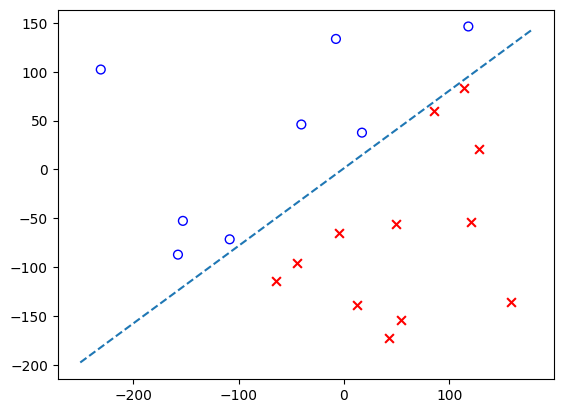

In [82]:
# Generate dataset with 20 data points
generate_dataset(20)

# Scatter plot the positive and negative class data points
scatter_points(positives, negatives)

# Calculate the slope and intercept of the decision boundary line
slope = -w1 / w2
intersect = - w0 / w2

# Plot the decision boundary line on the scatter plot
drawline(slope, intersect)


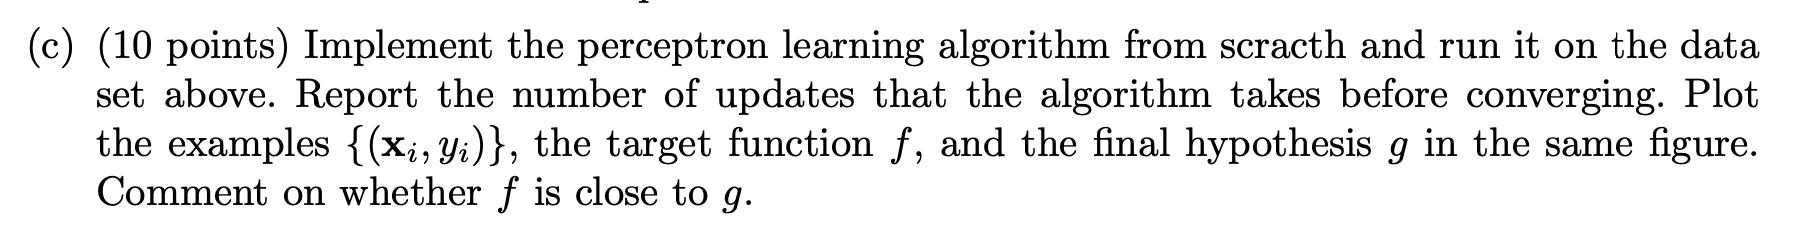

In [46]:
def pla(datasize):
  """
  Runs the Perceptron Learning Algorithm (PLA) on the global dataset with the given number of data points.
  
  Args:
  datasize (int): The number of data points to use for training the PLA.
  
  Returns:
  tuple: A tuple containing the weight vector and the number of iterations taken to converge.
  """
  # generating weight vector
  w = np.zeros(3)

  # generating data vector
  x = np.array([1, dataset[0][0], dataset[0][1]])

  # generating a random order list to traverse the data list randomly
  order = list(range(datasize))
  
  # classification list of the datapoints
  y_star = dataset[0][2]

  # check whether y_star = w^T * x for all x
  all_true = False
  
  # iteration counter
  counter = 0
  
  while(not all_true):
    
    # update the vector 
    w += y_star * x
    
    # initializing the flag to True
    # if we find a mispredicted point we set it to False
    all_true = True

    # iterate point by point
    for i in order:

      sample = [dataset[i][0], dataset[i][1]]
      y_star = dataset[i][2]

      x = np.array([1, dataset[i][0], dataset[i][1]])

      if int(np.sign(np.matmul(w, x))) != int(y_star):
        all_true = False
        break
    
    counter += 1
    
  return w, counter

In [47]:
# Generates a dataset with 1000 data points
generate_dataset(1000)

(array([[-131.52797322,   83.61423512,    1.        ],
        [ -67.23436066,  -44.9709295 ,    1.        ],
        [ 208.23216596,  -82.75167343,   -1.        ],
        ...,
        [ -41.7921526 , -259.1178946 ,   -1.        ],
        [-192.7803    ,   85.2782145 ,    1.        ],
        [ -28.77122563,    6.86211761,    1.        ]]),
 array([[-131.52797322,   83.61423512,    1.        ],
        [ -67.23436066,  -44.9709295 ,    1.        ],
        [-162.18563186,  133.63085353,    1.        ],
        ...,
        [-101.12530308,   55.77992953,    1.        ],
        [-192.7803    ,   85.2782145 ,    1.        ],
        [ -28.77122563,    6.86211761,    1.        ]]),
 array([[ 208.23216596,  -82.75167343,   -1.        ],
        [ 146.96239861,    2.96976165,   -1.        ],
        [ -52.93104032, -126.26215757,   -1.        ],
        ...,
        [  36.29361002,  -75.37091287,   -1.        ],
        [-147.24733537, -152.6411114 ,   -1.        ],
        [ -41.7921526 

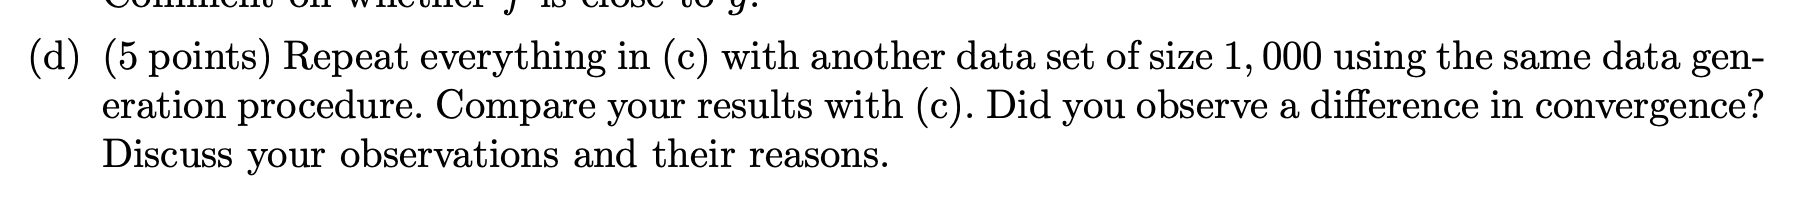

6440 [-3328.         -3261.49968713  4137.76888087] [-135.99982333  -89.8654172   113.14196117]


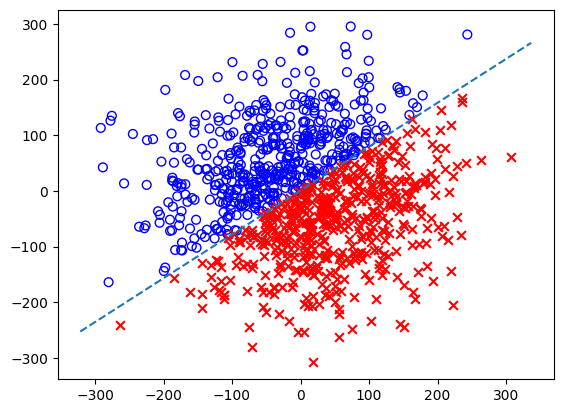

In [48]:
# generate dataset of 1000 points
generate_dataset(1000)

# run PLA algorithm on the generated dataset with 1000 points
w, counter = pla(1000)

# print the number of iterations, weight vector, and true linear separator
print(counter, w, linear_seperator)

# plot the positive and negative class data points
scatter_points(positives, negatives)

# plot the decision boundary using the weights calculated by the PLA
drawline(-(w[1] / w[2]), -(w[0] / w[2]))

# Q2: LINEAR REGRESSION

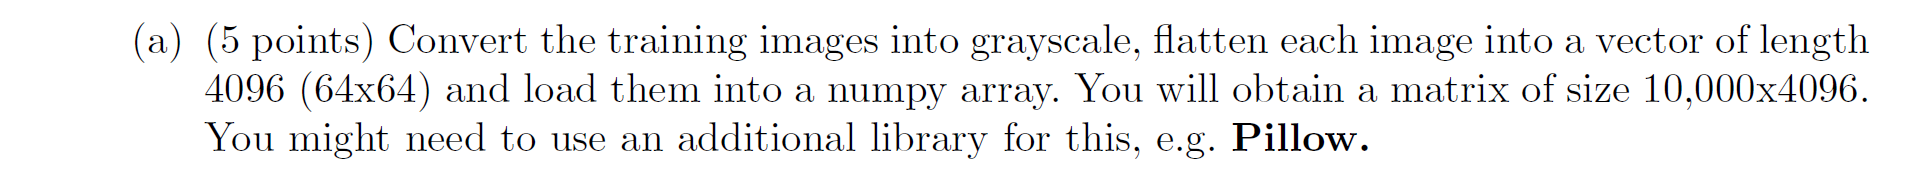

In [49]:
def convert_grayscale(folder_name, output_folder, grayscaled_img_vectors):
    """
    Convert a folder of color images to grayscale and store the grayscale images and their flattened pixel values.
    
    Args:
    - folder_name: the name of the input folder containing the color images
    - output_folder: the name of the output folder to save the grayscale images
    - grayscaled_img_vectors: an empty list to store the flattened pixel values of the grayscale images
    
    Returns:
    - None
    """
    
    # Iterate over all the files in the input folder
    for img in os.listdir(folder_name):
        
        # Open the image in RGB format
        img_rgb = PIL.Image.open(os.path.join(folder_name, img), 'r')
        
        # Convert the RGB image to grayscale
        img_gray = img_rgb.convert('L')
        
        # Save the grayscale image to the output folder for later use
        img_gray.save(os.path.join(output_folder, img))
        
        # Convert the grayscale image to a NumPy array and flatten the pixel values into a 1D array
        img_vector = np.asarray(img_gray).flatten()
        
        # Append the grayscaled and flattened vector to the list of vectors
        grayscaled_img_vectors.append(img_vector)

In [50]:
# Define the paths to the input and output folders

shapes_train_folder = os.path.join('.', 'linearRegression_data', '3dshapes_train')
train_target_folder = os.path.join('.', 'linearRegression_data', 'gray_scale_images_train')
shapes_test_folder = os.path.join('.', 'linearRegression_data', '3dshapes_test')
test_target_folder = os.path.join('.', 'linearRegression_data', 'gray_scale_images_test')
train_output_path = os.path.join('.', 'linearRegression_data', 'orientations_train.npy')
test_output_path = os.path.join('.', 'linearRegression_data', 'orientations_test.npy')

try:
    # Create the output folders for the grayscale images (if not exist)
    os.mkdir(train_target_folder)
    os.mkdir(test_target_folder)
except:
    None

# Create empty lists to store the flattened pixel values of the grayscale images
grayscaled_img_train = []
grayscaled_img_test = []

# Convert the training and test images to grayscaled and flattened version and save them to the output folders
convert_grayscale(shapes_train_folder, train_target_folder, grayscaled_img_train)
convert_grayscale(shapes_test_folder, test_target_folder, grayscaled_img_test)

# Convert the lists of grayscale images to NumPy arrays
grayscaled_img_train = np.array(grayscaled_img_train)
grayscaled_img_test = np.array(grayscaled_img_test)

# Define the paths to the output files for the formatted image matrices
formatted_train_path = os.path.join('.', 'linearRegression_data', 'formatted_train_matrix.npy')
formatted_test_path = os.path.join('.', 'linearRegression_data', 'formatted_test_matrix.npy')

# Save the formatted image matrices as NumPy files
np.save(formatted_train_path, grayscaled_img_train)
np.save(formatted_test_path, grayscaled_img_test)

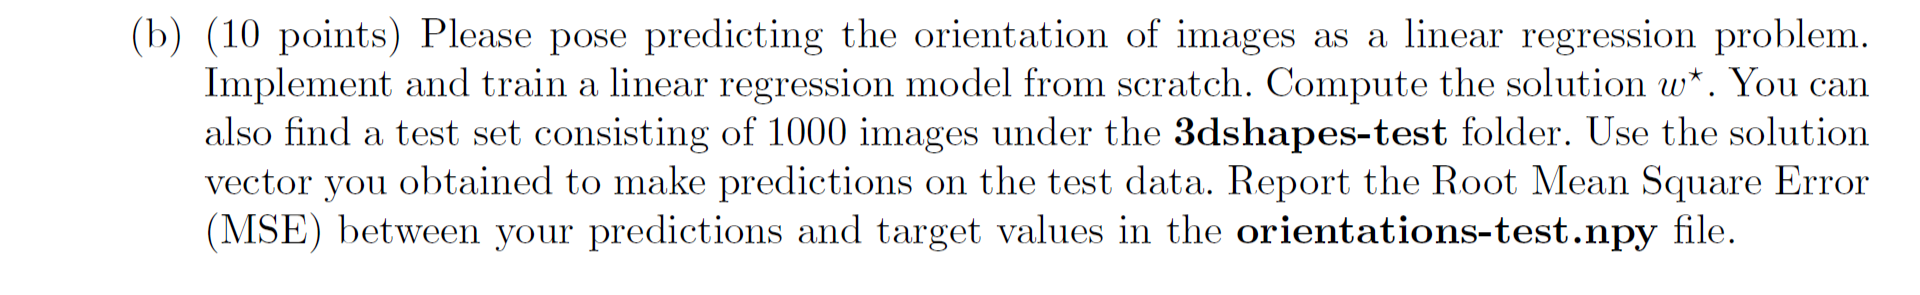

In [51]:
def normalize(matrix, multiplier):
    """
    Normalize the input matrix to a range between 0 and `multiplier`.
    
    Args:
    - matrix: a NumPy array
    - multiplier: the maximum value of the normalized matrix
    
    Returns:
    - The normalized matrix as a NumPy array.
    """
    # Find the maximum and minimum values in the matrix
    matrix_max = np.max(matrix)
    matrix_min = np.min(matrix)
    
    # Compute the range of the vector, taking care to handle the case where max = min
    matrix_range = 1 if matrix_max == matrix_min else matrix_max - matrix_min
    
    # Normalize the vector to a range between 0 and `multiplier`
    matrix = (matrix - matrix_min) / (matrix_range) * multiplier
    
    # Return the normalized vector
    return matrix

In [52]:
# Load the formatted training and test image matrices from the saved files

vector_matrix_train = np.asmatrix(np.load(formatted_train_path).astype('float64'))
vector_matrix_test = np.asmatrix(np.load(formatted_test_path).astype('float64'))
y_train = np.asmatrix(np.load(train_output_path).astype('float64')).T
y_test = np.asmatrix(np.load(test_output_path).astype('float64')).T

# Standardize the input data using min-max normalization
vector_matrix_train = normalize(vector_matrix_train, 1)
vector_matrix_test = normalize(vector_matrix_test, 1)

# Standardize the output data using min-max normalization
y_train = normalize(y_train, 1)
y_test = normalize(y_test, 1)

In [53]:
def calculate_mse(y_actual, y_predicted):
    """
    Calculate the mean squared error between the actual and predicted output vectors.
    
    Args:
    - y_actual: a 2D NumPy array representing the actual output values
    - y_predicted: a 2D NumPy array representing the predicted output values
    
    Returns:
    - The mean squared error as a scalar value.
    """
    
    # Compute the residual between the actual and predicted output vectors
    residual = y_actual - y_predicted
    
    # Compute the sum of squared errors (L2 norms) divided by the data size
    error = np.dot(residual.T, residual)/(y_actual.size)
    
    # Return the mean squared error
    return error

In [54]:
def predict(x, weight):
    """
    Calculate the predicted output vector given the input vector and weight vector.
    
    Args:
    - x: a NumPy array representing the input vector
    - weight: a NumPy array representing the weight vector
    
    Returns:
    - The predicted output vector as a NumPy array.
    """
    
    # Compute the predicted output vector by taking the dot product of the input and weight vectors
    y_predicted = np.dot(x, weight)
    
    # Return the predicted output vector
    return y_predicted

In [55]:
def add_bias_term(x):
    """
    Add a column of ones to the input matrix for the bias term.
    
    Args:
    - x: a NumPy array representing the input matrix
    
    Returns:
    - The input matrix with a bias term added as the first column.
    """
    
    # Create a column of ones with the same number of rows as the input matrix
    ones_column = np.ones((len(x),1))
    
    # Concatenate the column of ones to the beginning of the input matrix
    x_b = np.c_[ones_column, x]
    
    # Return the input matrix with the bias term added as the first column
    return x_b

In [56]:
def gradient_descent(x, y, learning_rate, epochs):
    """
    Perform gradient descent on the input data to find the optimal weight vector.
    
    Args:
    - x: a NumPy array representing the input data
    - y: a NumPy array representing the output data
    - learning_rate: the learning rate for the gradient descent algorithm
    - epochs: the number of iterations to run the gradient descent algorithm
    
    Returns:
    - The optimal weight vector as a NumPy array.
    """
    
    # Save the data size
    n = y.size
    
    # Add a bias term (a column of ones) to the input matrix
    x_b = add_bias_term(x)
    
    # Create the initial weight vector(zero matrix) with the bias term 
    w = np.zeros((x_b.shape[1],1))

    # Iterate over the specified number of epochs
    for i in range(epochs): 
        
        # Calculate the predicted output vector using the current weight vector
        y_predicted = normalize(predict(x_b, w), 1)
        
        # Calculate the mean squared error for the current weight vector
        error = calculate_mse(y, y_predicted)
        
        # Compute the gradient of the error function for features and bias
        gradient_m = -(2 / n) * np.dot(x.T, (y - y_predicted))
        gradient_b = -(2 / n) * np.sum((y - y_predicted))

        # Compute the gradient vector using the gradient of tha feature weights and gradient of bias
        gradient = np.insert(gradient_m, 0, gradient_b).T
        
        # Update the weights
        w -= learning_rate * gradient
           
    # Return the optimal weight vector
    return w

In [57]:
# Compute the weight vector using gradient descent
w_star = gradient_descent(vector_matrix_train, y_train, 2, 800)

In [58]:
# Calculate the predicted output for the training data using the optimal weight vector
y_star = np.dot(add_bias_term(vector_matrix_train), w_star)
y_star = normalize(y_star, 1)

# Calculate the predicted output for the test data using the optimal weight vector
y_star_test = np.dot(add_bias_term(vector_matrix_test), w_star)
y_star_test = normalize(y_star_test, 1)

# Calculate the root mean square error (RMSE) for the training data
rmse_train = math.sqrt(calculate_mse(y_train, y_star))

# Calculate the root mean square error (RMSE) for the test data
rmse_test = math.sqrt(calculate_mse(y_test, y_star_test))

# Print the RMSE for the training and test data
print(rmse_train, rmse_test)

# RMSE values for different values of the learning rate and number of epochs

# learning_rate = 6
# 100: 0.3555370646284786 0.35029285175890024
# 200: 0.3587383569383618 0.35110977488350664
# 50: 0.36371306879314697 0.3873020386582341
# 150: 0.3649465784501776 0.3868158663087795

# learning_rate = 2
# 150: 0.3649465784267624 0.38681586630030496
# 200: 0.3587384054480546 0.351109778849602
# 400: 0.3620446620456539 0.3520796428009873
# 800: 0.3608783672636264 0.34974278170897133
# 1000: 0.3559225796723626 0.3614114956438067
# 1500: 0.34698924282703886 0.3727267938754095


0.3608783672636264 0.34974278170897133


In [59]:
def selectNewDimension(vector_matrix_train, vector_matrix_test, y_test, list_of_dimensionalities):
    """
    This function selects the best dimensionality for PCA reduction based on the minimum RMSE value. 
    
    Parameters:
    vector_matrix_train (array): The input matrix for training data
    vector_matrix_test (array): The input matrix for testing data
    y_test (array): The target labels for testing data
    list_of_dimensionalities (list): A list of dimensionalities to be tested for PCA reduction
    
    Returns:
    tuple: A tuple containing the best dimensionality and the minimum RMSE value.
    """

    # set initial values
    min_rmse_pca = math.inf
    best_dimensionality = 4096

    # loop through the list of dimensionalities
    for n in list_of_dimensionalities:
        # apply PCA with the given dimensionality
        pca = PCA(n_components=n)

        # reduce dimensions for training and testing data
        x_reduced = pca.fit_transform(np.asarray(vector_matrix_train))
        x_test_reduced = pca.fit_transform(np.asarray(vector_matrix_test))

        # perform gradient descent to calculate weights
        weight_reduced = gradient_descent(x_reduced, y_train, 2, n)

        # calculate predicted values for testing data
        y_test_reduced = np.dot(add_bias_term(x_test_reduced), weight_reduced)
        y_test_reduced = normalize(y_test_reduced, 1)

        # calculate RMSE for testing data
        rmse_test = math.sqrt(calculate_mse(y_test, y_test_reduced))

        # update best values if new minimum RMSE is found
        if rmse_test < min_rmse_pca:
            min_rmse_pca = rmse_test
            best_dimensionality = n

    return (best_dimensionality, min_rmse_pca)

In [60]:
# List of dimensionalities to test
dimension_list = [2, 4, 5, 10, 25, 50, 100, 200, 500]

# Get the best dimensionality and test error using the selectNewDimension function
best_dimension, test_error = selectNewDimension(vector_matrix_train, vector_matrix_test, y_test, dimension_list)

# Print the results
print(f'Reducing the problem to {best_dimension} results in RMSE={test_error} in the test sample.')

Reducing the problem to 25 results in RMSE=0.3568497694570587 in the test sample.


# Q3: LOGISTIC REGRESSION

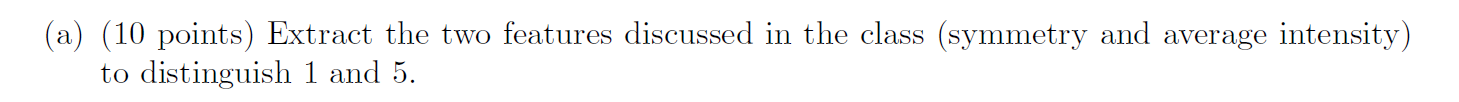

In [61]:
base_folder = os.path.join('.', 'logisticRegression_data', 'logisticRegression_data')

# training records, with 256 features
train_matrix = np.load(os.path.join(base_folder, 'train_data.npy'))

# outputs of the training records
train_labels = np.load(os.path.join(base_folder, 'train_labels.npy'))

# test records, with 256 features
test_matrix = np.load(os.path.join(base_folder, 'test_data.npy'))
# outputs of the test records
test_labels = np.load(os.path.join(base_folder, 'test_labels.npy'))

"""
each image is given as a flattened vector, it would be beneficial to
convert that vector to a square matrix
""" 
img_size = int(math.sqrt(len(train_matrix[0])))

In [62]:
def dimensionalityReduction(input_matrix):
    # scalar symmetry values of images, with respect to their horizontally flipped images 
    symmetries = []
    # scalar intensity values of images, the average value of all pixels of an image
    intensities = []

    # traverse images one by one
    for record_index in range(len(input_matrix)):


        # image as a square matrix
        img = input_matrix[record_index].reshape(img_size, img_size)
        
        # flipped version of the image
        flipped = np.flip(img, 0)

        difference_matrix = img - flipped

        # absolute difference between the image and its flipped version, which gives the symmetry value
        absolute_difference = - np.sum(np.abs(difference_matrix))
        symmetries.append(absolute_difference)
        
        # the average value of all pixels of an image, which gives the intensity value
        intensity = np.sum(img) / (img_size ** 2)
        intensities.append(intensity)

    intensities = np.array(intensities)
    symmetries = np.array(symmetries)

    return intensities, symmetries

In [63]:
def prepareDataPoints(intensities, symmetries, two_dimensional_records, labels):
    
    # symmetry and intensity values of images labeled as 1
    list_of_ones = []
    # symmetry and intensity values of images labeled as 5
    list_of_fives = []
    
    # finding minimum and maximum values for min-max normalization
    min_symmetry, max_symmetry = (np.min(symmetries), np.max(symmetries))
    min_intensity, max_intensity = (np.min(intensities), np.max(intensities))

    # normalize the symmetry and intensity values to the interval [-1, 0]
    symmetry_normalized = - (symmetries - min_symmetry) / (max_symmetry - min_symmetry)
    intensity_normalized = - (intensities - min_intensity) / (max_intensity - min_intensity)


    for record_index in range(len(symmetry_normalized)):

        # label of the corresponding record
        label = labels[record_index]
        
        # corresponding point for the record in 2-dimensional space(intensity and symmetry)
        point = [1, symmetry_normalized[record_index], intensity_normalized[record_index]]

        two_dimensional_records.append(point)
        
        # gather records labeled as 1 and 5 seperately
        list_of_ones.append(point[1:]) if label == 1 else list_of_fives.append(point[1:])


    list_of_ones = np.array(list_of_ones)
    list_of_fives = np.array(list_of_fives)

    return list_of_ones, list_of_fives

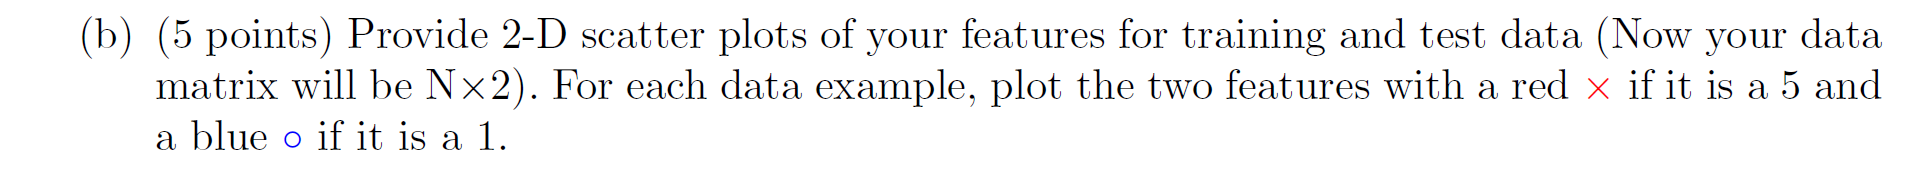

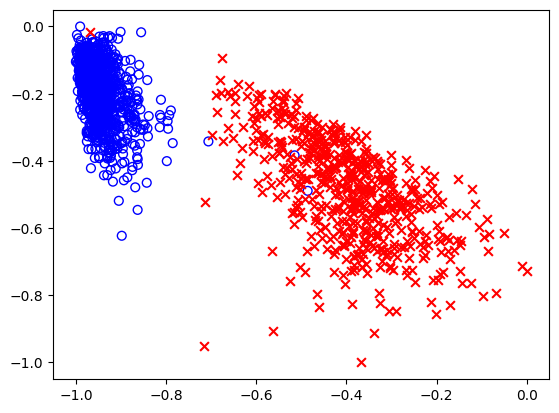

In [64]:
records_two_dimension = []
intensities, symmetries = dimensionalityReduction(train_matrix)
list_of_ones, list_of_fives = prepareDataPoints(intensities, symmetries, records_two_dimension, train_labels)
scatter_points(list_of_ones, list_of_fives)

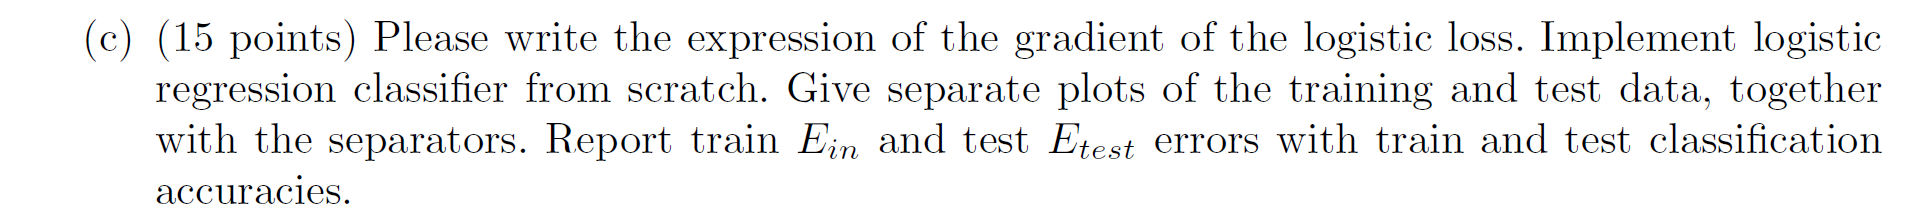

In [65]:
# this function calculates the gradient of the logistic loss function of logistic regression learning algorithm.
# mathematical derivation can be found in the report.
# grad(f(w)) = (1 / N) * sum([(- y_n * x_n) * exp(- y_n * w^T * x_n)] / (1 + exp(- y_n * w^T * x_n))) + (2 * lambda * w)
def gradient(labels, weight_vector, records, regularizer):
    
    # the result of the gradient will be a vector
    sum_without_regularizer = np.zeros(len(records[0]))

    # sum iterator
    for n in range(len(records)):
        
        x_n = records[n]
        # y_n
        label_n = labels[n]
        # (- y_n * w^T * x_n)
        exponential_inside = (- label_n) * np.dot(weight_vector.T, x_n)
        exponential = np.float64(math.exp(exponential_inside))
        
        # [(- y_n * x_n) * exp(- y_n * w^T * x_n)]
        nominator = (- label_n) * exponential * x_n
        # (1 + exp(- y_n * w^T * x_n))
        denominator = 1 + exponential

        sum_without_regularizer += nominator / denominator

    # sum / N + (2 * lambda * w)
    result = (sum_without_regularizer / len(records)) + 2 * regularizer * weight_vector
    return result

In [66]:
# gradient descent algorithm for logistic regression
def gradientDescent(labels, records, regularizer, eta, gradient_threshold):
    
    # initial weight = 0-vector
    weights = np.zeros(len(records[0]))
    # iterate until you can assume you hit the local min
    local_min_hit = False
    # counter for iteration
    counter = 0
    
    while(not local_min_hit):
        # compute the gradient
        gradient_t = gradient(labels, weights, records, regularizer)

        # update the weight vector
        weights -= eta * gradient_t

        # if average sum of the absolute values of the gradient elements is less than threshold, terminate the weight calculation 
        average_grad = np.abs(np.sum(gradient_t)) / len(gradient_t)
        local_min_hit = True if average_grad < gradient_threshold else False
        counter += 1

    return weights

## Training Plot

In [67]:
train_records_2D = []
intensities, symmetries = dimensionalityReduction(train_matrix)
list_of_ones, list_of_fives = prepareDataPoints(intensities, symmetries, train_records_2D, train_labels)

eta_train = 6
gradient_threshold = 0.0005
w_train = gradientDescent(train_labels, np.array(train_records_2D), 0, eta_train, gradient_threshold)

(-1.25, 0.25)

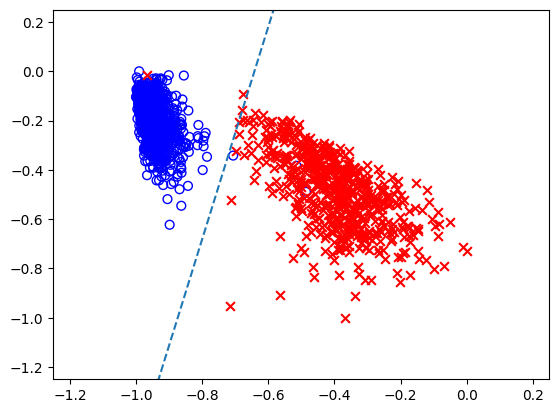

In [68]:
scatter_points(list_of_ones, list_of_fives)

h_x = np.dot(train_records_2D, w_train)
drawline(-w_train[1] / w_train[2], -w_train[0] / w_train[2])

matplotlib.pyplot.ylim(-1.25, 0.25)
matplotlib.pyplot.xlim(-1.25, 0.25)

## Testing Plot

In [69]:
test_records_2D = []
intensities, symmetries = dimensionalityReduction(test_matrix)
list_of_ones, list_of_fives = prepareDataPoints(intensities, symmetries, test_records_2D, test_labels)

eta_test = 6
gradient_threshold = 0.0005
w_test = gradientDescent(test_labels, np.array(test_records_2D), 0, eta_test, gradient_threshold)

(-1.25, 0.25)

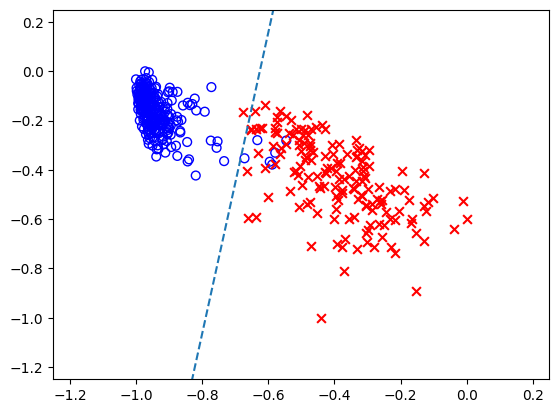

In [70]:
scatter_points(list_of_ones, list_of_fives)

h_x = np.dot(test_records_2D, w_test)
drawline(-w_test[1] / w_test[2], -w_test[0] / w_test[2])

matplotlib.pyplot.ylim(-1.25, 0.25)
matplotlib.pyplot.xlim(-1.25, 0.25)

## Error Calculation

In [71]:
# E(w) = (1 / N) * (sum( ln(1 + exp{- y_n * w^T * x_n}) ) for n=1 to N)
def logisticError(labels, weight, records):
    
    # 1 + exp{- y_n * w^T * x_n}
    exponential = 1 + np.exp(- labels * np.dot(records, weight.T))
    # sum( ln(1 + exponential) )
    result = np.sum(np.log(exponential)) / labels.size
    
    return result
    

### Training Error

In [72]:
logisticError(train_labels, w_train, train_records_2D)

0.024314116846505193

### Test Error

In [73]:
logisticError(test_labels, w_test, test_records_2D)

0.049829666188745604

### Test Classification Accuracy

In [74]:
# theta(s) = 1 / (1 + e^(-s))
def sigmoidPrediction(s):
    
    sigmoid_value = 1/(1 + np.exp(-s))
    
    # return the predictions. if sigmoid gives a value greater than 0.5, than classify record as 1; -1 otherwise.
    return np.sign(sigmoid_value - 0.5)

In [75]:
def classificationAccuracy(y_actual, h_x):
    
    y_pred = sigmoidPrediction(h_x)

    # assume y_actual is the true labels for the test set and y_pred is the predicted labels for the test set
    correct_predictions = np.sum(y_actual == y_pred)
    # calculate accuracy
    accuracy =  correct_predictions / len(y_actual)
    
    return accuracy

In [76]:
classificationAccuracy(test_labels, h_x)

0.9834905660377359

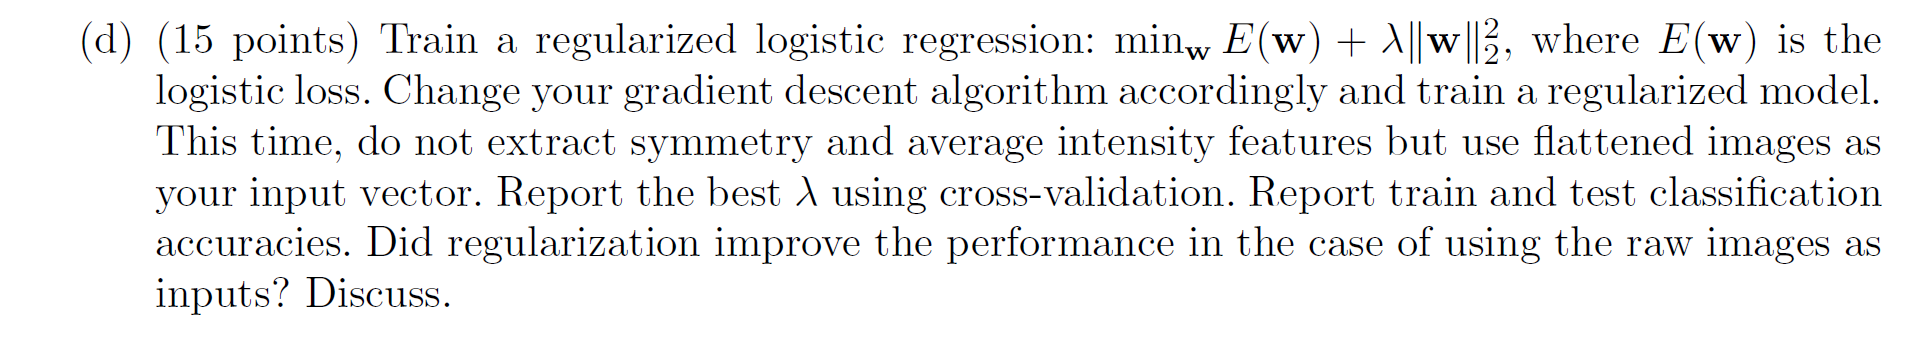

### Cross Validation

In [77]:
def kCrossValidation(k, train_output_data, train_input_data, test_output_data, test_input_data, eta, gradient_threshold, lambdas):
    
    # output will be held as a dictionary: lambda values(regularizers) as keys and some metrics, error and accuracy measurements, as values
    resulting_lambda_accuracies = {}
    
    # shuffle the matrix to be able to split it randomly
    indices = np.random.permutation(len(train_input_data))
    splitted_input = np.array(np.array_split(train_input_data[indices], k))
    splitted_output =  np.array(np.array_split(train_output_data[indices], k))
    
    for lambda_value in lambdas:
        
        # the average of all weight vectors calculated in different foldings of the same lambda value
        avg_weight_star = np.zeros(len(train_input_data[0]))
        # the average of all accuracy measurements calculated in different foldings of the same lambda value
        train_accuracy = 0
        # the average of all error measurements calculated in different foldings of the same lambda value
        train_error = 0

        for fold_number in range(k):
            
            # reserve one fold to testing
            test_input = splitted_input[fold_number]
            # all the remaining folds will be used in training
            train_input = np.concatenate((splitted_input[ : fold_number], splitted_input[fold_number + 1 : ]))

            # gather all training folds in one matrix
            train_input_matrix = train_input[0]            
            for index in range(1, len(train_input)):
               train_input_matrix = np.concatenate((train_input_matrix, train_input[index]))

            # get the labels of the records reserved for testing
            test_output = splitted_output[fold_number]
            # all the remaining folds will be used in training
            train_output = np.concatenate((splitted_output[ : fold_number], splitted_output[fold_number + 1 : ]))
            
            # gather all training folds in one vector
            train_output_matrix = train_output[0]
            for index in range(1, len(train_output)):
               train_output_matrix = np.concatenate((train_output_matrix, train_output[index]))

            # calculate final weight vector
            weight_star = gradientDescent(train_output_matrix, train_input_matrix, lambda_value, eta, gradient_threshold)

            # values predicted by the weight vector derived
            h_x = np.dot(test_input, weight_star)
            
            # keep accuracy and error measurements
            train_accuracy += classificationAccuracy(test_output, h_x)
            train_error += logisticError(train_output_matrix, weight_star, train_input_matrix)

            # keep the weight vector
            avg_weight_star += weight_star

        # take the averages of errors, accuracies, and weight vectors
        train_error /= k
        avg_weight_star /= k
        train_accuracy /= k

        # find the values predicted by the average weight vector, for the test records
        # note that the k-fold cross validation model does not use the part reserved for the testing until this point
        h_test = np.dot(test_input_data, avg_weight_star)

        # accuracy and error measurements for the test data
        test_accuracy = classificationAccuracy(test_output_data, h_test)
        test_error = logisticError(test_output_data, avg_weight_star, test_input_data)
        
        # update the dictionary that will be returned
        # save the metrics calculated for the given lambda
        resulting_lambda_accuracies[lambda_value] = {'avg_cross_v_error': train_error, 
                                                      'test_error': test_error, 
                                                      'avg_cross_v_accuracy': train_accuracy, 
                                                      'test_accuracy': test_accuracy}
        
    return resulting_lambda_accuracies

In [78]:
lambda_values = [0, 1e-15, 1e-10, 1e-5, 0.001, 0.003, 0.005, 0.007, 0.009, 0.0130, 0.0150, 0.0170, 0.0200, 0.0300, 0.0370]
lambda_metrics = kCrossValidation(7, train_labels, train_matrix, test_labels, test_matrix, 4, 0.0005, lambda_values)


In [79]:
min_error = math.inf
max_accuracy = 0
selected_lambda = -1
for key in lambda_metrics:
    if lambda_metrics[key]['test_error'] < min_error:
        selected_lambda = key
        min_error = lambda_metrics[key]['test_error']
        max_accuracy = lambda_metrics[key]['test_accuracy']

print(f'lambda value {selected_lambda} gives {max_accuracy} test accuracy with {min_error} error.')

lambda value 0.02 gives 0.9905660377358491 test accuracy with 0.05800344284108568 error.
